In [1]:
from peft import AutoPeftModelForSequenceClassification
from transformers import AutoTokenizer, BitsAndBytesConfig
import torch
import evaluate
from datasets import load_dataset
from torch.nn import CrossEntropyLoss

/h/dorsasm/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/h/dorsasm/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
bnb_config = BitsAndBytesConfig(
load_in_4bit=True,
bnb_4bit_use_double_quant=True,
bnb_4bit_quant_type="nf4",
bnb_4bit_compute_dtype=torch.bfloat16
)

In [3]:
id2label = {0: "negative", 1: "neutral", 2: "positive"}
label2id = {"negative": 0, "neutral": 1, "positive": 2}

In [4]:

epochs = ['/scratch/ssd004/scratch/dorsasm/privacyllm/tweet_shield_dp_trained_model/checkpoint-1363','/scratch/ssd004/scratch/dorsasm/privacyllm/tweet_shield_dp_trained_model/checkpoint-2726',
         '/scratch/ssd004/scratch/dorsasm/privacyllm/tweet_shield_dp_trained_model/checkpoint-4089','/scratch/ssd004/scratch/dorsasm/privacyllm/tweet_shield_dp_trained_model/checkpoint-5452',
         '/scratch/ssd004/scratch/dorsasm/privacyllm/tweet_shield_dp_trained_model/checkpoint-6815','/scratch/ssd004/scratch/dorsasm/privacyllm/tweet_shield_dp_trained_model/checkpoint-8178',
         '/scratch/ssd004/scratch/dorsasm/privacyllm/tweet_shield_dp_trained_model/checkpoint-9541','/scratch/ssd004/scratch/dorsasm/privacyllm/tweet_shield_dp_trained_model/checkpoint-10904',
         '/scratch/ssd004/scratch/dorsasm/privacyllm/tweet_shield_dp_trained_model/checkpoint-12267']

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

In [6]:
def preprocess_fn(examples):
    return tokenizer(examples["text"], truncation=True)

def change_labels(example):
    label = example["label"]
    n_label = 0 if label == "negative" else 1 if label == "neutral" else 2
    example["label"] = n_label
    return example

epoch number:  1


`low_cpu_mem_usage` was None, now set to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of LlamaForSequenceClassification were not initialized from the model checkpoint at /model-weights/Llama-2-7b-hf and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[[ 45  18 239]
 [ 46 232  22]
 [ 45  11 252]]


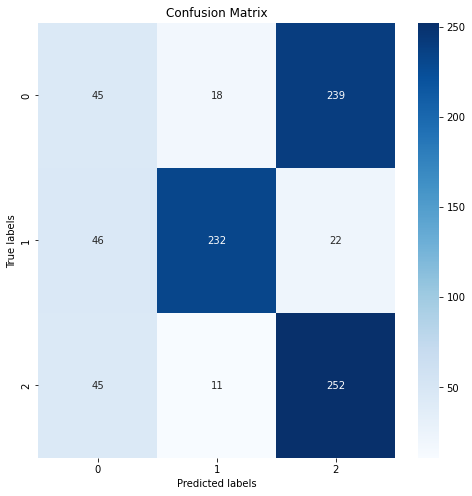

`low_cpu_mem_usage` was None, now set to True since model is quantized.


epoch number:  2


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of LlamaForSequenceClassification were not initialized from the model checkpoint at /model-weights/Llama-2-7b-hf and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/910 [00:00<?, ? examples/s]

Map:   0%|          | 0/910 [00:00<?, ? examples/s]

[[ 95  22 185]
 [  2 291   7]
 [ 75  14 219]]


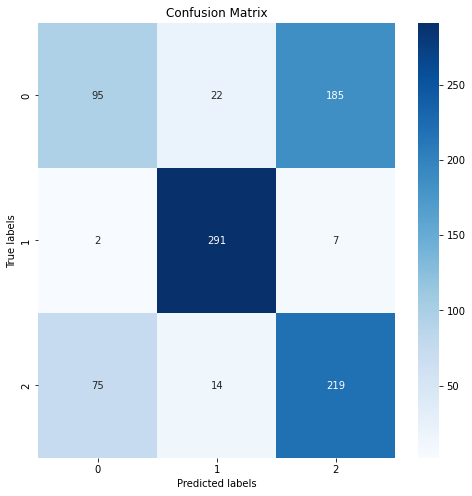

`low_cpu_mem_usage` was None, now set to True since model is quantized.


epoch number:  3


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of LlamaForSequenceClassification were not initialized from the model checkpoint at /model-weights/Llama-2-7b-hf and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/910 [00:00<?, ? examples/s]

Map:   0%|          | 0/910 [00:00<?, ? examples/s]

[[113  15 174]
 [  2 291   7]
 [ 83   7 218]]


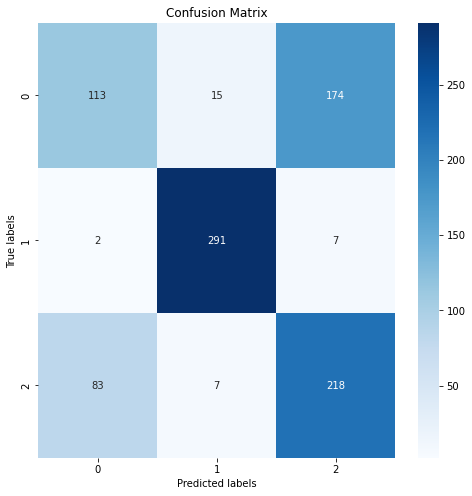

`low_cpu_mem_usage` was None, now set to True since model is quantized.


epoch number:  4


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of LlamaForSequenceClassification were not initialized from the model checkpoint at /model-weights/Llama-2-7b-hf and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/910 [00:00<?, ? examples/s]

Map:   0%|          | 0/910 [00:00<?, ? examples/s]

[[104  12 186]
 [  2 291   7]
 [ 73   6 229]]


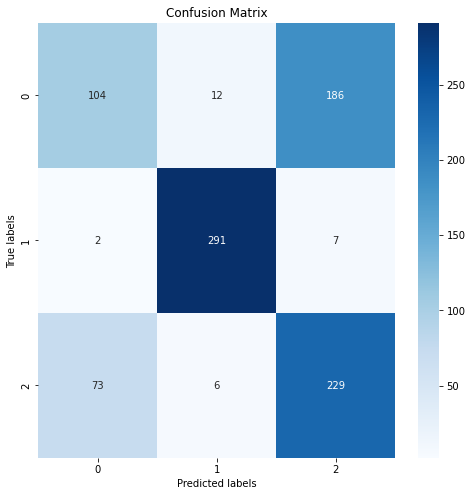

`low_cpu_mem_usage` was None, now set to True since model is quantized.


epoch number:  5


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of LlamaForSequenceClassification were not initialized from the model checkpoint at /model-weights/Llama-2-7b-hf and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/910 [00:00<?, ? examples/s]

Map:   0%|          | 0/910 [00:00<?, ? examples/s]

[[112  11 179]
 [  2 293   5]
 [ 74   5 229]]


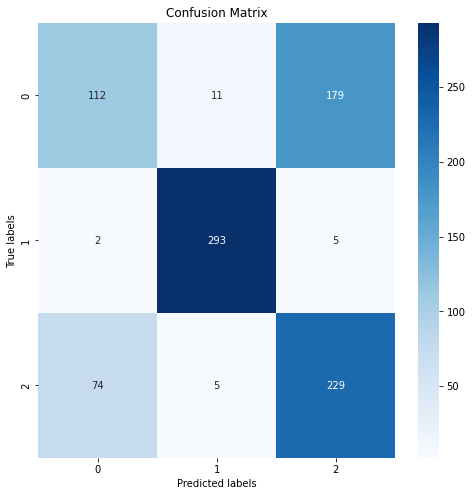

`low_cpu_mem_usage` was None, now set to True since model is quantized.


epoch number:  6


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of LlamaForSequenceClassification were not initialized from the model checkpoint at /model-weights/Llama-2-7b-hf and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/910 [00:00<?, ? examples/s]

Map:   0%|          | 0/910 [00:00<?, ? examples/s]

[[119   7 176]
 [  2 293   5]
 [ 71   3 234]]


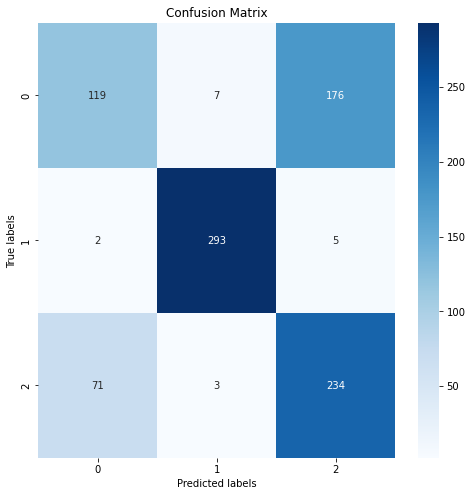

`low_cpu_mem_usage` was None, now set to True since model is quantized.


epoch number:  7


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of LlamaForSequenceClassification were not initialized from the model checkpoint at /model-weights/Llama-2-7b-hf and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/910 [00:00<?, ? examples/s]

Map:   0%|          | 0/910 [00:00<?, ? examples/s]

[[125   6 171]
 [  2 294   4]
 [ 69   3 236]]


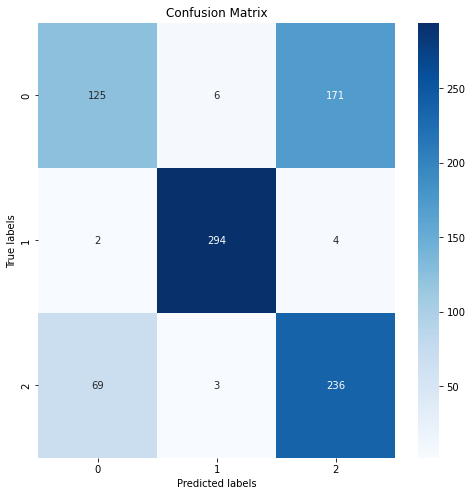

`low_cpu_mem_usage` was None, now set to True since model is quantized.


epoch number:  8


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of LlamaForSequenceClassification were not initialized from the model checkpoint at /model-weights/Llama-2-7b-hf and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/910 [00:00<?, ? examples/s]

Map:   0%|          | 0/910 [00:00<?, ? examples/s]

[[123   6 173]
 [  1 295   4]
 [ 62   3 243]]


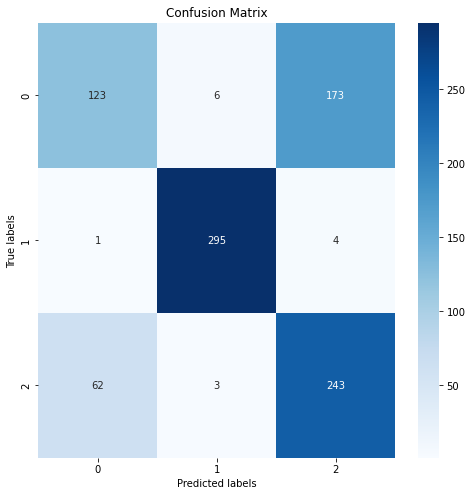

`low_cpu_mem_usage` was None, now set to True since model is quantized.


epoch number:  9


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of LlamaForSequenceClassification were not initialized from the model checkpoint at /model-weights/Llama-2-7b-hf and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/910 [00:00<?, ? examples/s]

Map:   0%|          | 0/910 [00:00<?, ? examples/s]

[[124   6 172]
 [  0 296   4]
 [ 60   3 245]]


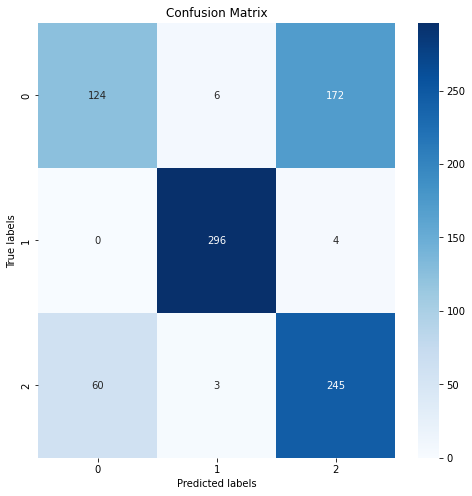

In [7]:
epochNum = 0
for epoch in epochs:
    
    epochNum+=1
        
    print("epoch number: ", epochNum)
    device = "cuda"
    model = AutoPeftModelForSequenceClassification.from_pretrained(
    epoch,
    num_labels=3,
    quantization_config=bnb_config
    )
    
    model = model.to(device)
    #print(model.eval())
    
    torchE = str(epoch) + '/score.original_module.pt'
    score_weights = torch.load(torchE,map_location="cpu")
    model.score.original_module.load_state_dict(score_weights)
    
    tokenizer = AutoTokenizer.from_pretrained(epoch)
    
    orig_dataset = load_dataset("parquet", data_files="./data_balanced.parquet")

    dataset = orig_dataset.rename_column("Lable", "label").rename_column("Text", "text")
    dataset = dataset["train"].train_test_split(test_size=0.1, seed=42)

    toked = dataset.map(preprocess_fn, batched=True)
    toked_dataset = toked.map(change_labels)

    
    true_labels = []
    predicted_labels = []

    model.eval() 

    with torch.no_grad():
        for i, data in enumerate(toked_dataset["test"]):

            logits = model(input_ids=torch.tensor([data["input_ids"]]).to(device))["logits"]
        
            predicted_label = torch.argmax(logits, dim=-1)
        
            predicted_labels.append(predicted_label.cpu().numpy()[0])
            true_labels.append(data["label"])
        
            # Break the loop after 1000 to save time
            if i >= 1000:
                break

    #confusion matrix
    cm_result = confusion_matrix(true_labels, predicted_labels)
    print(cm_result)
    
    
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(cm_result, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.show()
